<h2> <font color="blue">II. Programming [9v] </font>
                           
<h4><font color="cyan"> Consider the diabetes.arff data available at the homework tab, comprising 8 biological features to 
classify 768 patients into 2 classes (normal, diabetes).

In [15]:
import seaborn as sns
import pandas as pd
from scipy.io import arff
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import numpy as np

data = arff.loadarff('diabetes.arff')
df = pd.DataFrame(data[0])

<h4> <font color="cyan"> 1)  [1v] ANOVA is a statistical test that can be used to assess the discriminative power of a 
single input variable. Using f_classif from sklearn, identify the input variables with the 
worst and best discriminative power. Plot their class-conditional probability density 
functions.

Variable with the best discriminative power: Glucose:213.16175217803828
Variable with the worst discriminative power: BloodPressure:3.256950397889028


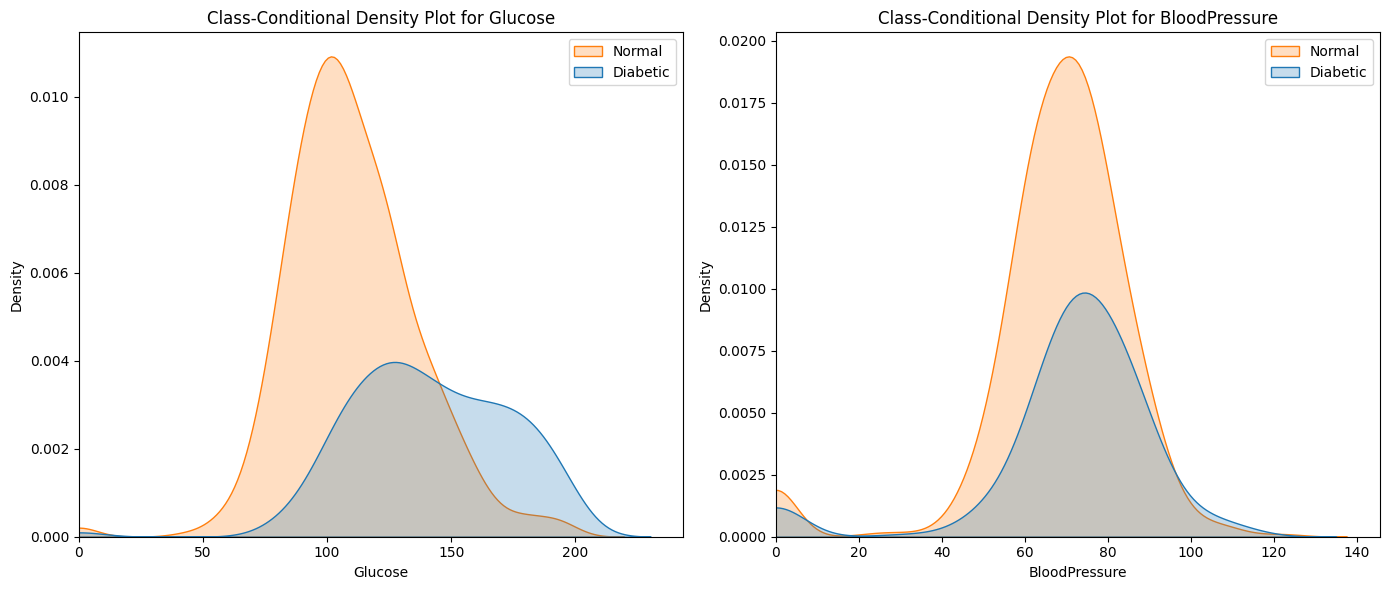

In [16]:
df['Outcome'] = df['Outcome'].str.decode('utf-8')
x = df.drop('Outcome', axis=1)
y = df['Outcome']

fimportance, p_value = f_classif(x, y)

feature_scores = sorted(zip(x.columns, fimportance), key=lambda x: x[1], reverse=True)
best_feature = feature_scores[0][0]
worst_feature = feature_scores[-1][0]
print(f"Variable with the best discriminative power: {best_feature}:{feature_scores[0][1]}")
print(f"Variable with the worst discriminative power: {worst_feature}:{feature_scores[-1][1]}")

plt.figure(figsize=(14, 6))

# Plot for the best feature
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x=best_feature, hue='Outcome', fill=True)
plt.title(f'Class-Conditional Density Plot for {best_feature}')
plt.xlim(left=0)
plt.legend(title='', labels=["Normal", "Diabetic"])
# Plot for the worst feature
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x=worst_feature, hue='Outcome', fill=True)
plt.title(f'Class-Conditional Density Plot for {worst_feature}')
plt.xlim(left=0)
plt.legend(title='', labels=["Normal", "Diabetic"])

plt.tight_layout()

<h4> <font color="cyan"> 2)  [4v] Using a stratified 80-20 training-testing split with a fixed seed (random_state=1), 
assess in a single plot both the training and testing accuracies of a decision tree with minimum 
sample split in {2,5,10,20,30,50,100} and the remaining parameters as default.  
[optional] Note that split thresholding of numeric variables in decision trees is non-
deterministic in sklearn, hence you may opt to average the results using 10 runs per 
parameterization.

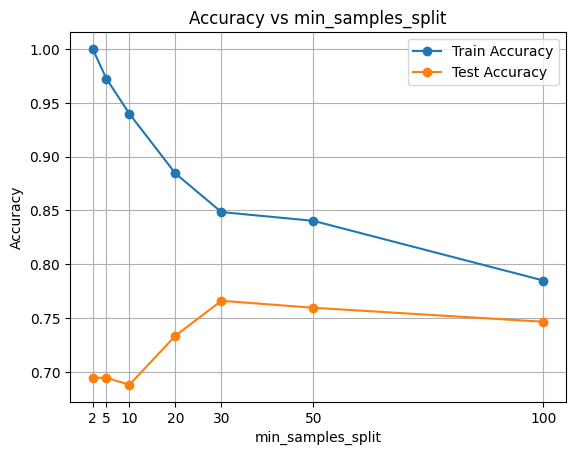

In [17]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

sample_split = [2, 5, 10, 20, 30, 50, 100]
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, stratify=y, random_state=1)

accuracies_train = []
accuracies_test = []

for split in sample_split:
    split_accuracies_train = []
    split_accuracies_test = []
    for i in range(10):
        predictor = DecisionTreeClassifier(min_samples_split=split, random_state=1)
        predictor.fit(X_train, y_train)
        y_pred = predictor.predict(X_train)
        y_pred1 = predictor.predict(X_test)
        split_accuracies_train.append(metrics.accuracy_score(y_train, y_pred))
        split_accuracies_test.append(metrics.accuracy_score(y_test, y_pred1))
    avg_accuracy_train = np.mean(split_accuracies_train)
    accuracies_train.append(avg_accuracy_train)
    avg_accuracy_test = np.mean(split_accuracies_test)
    accuracies_test.append(avg_accuracy_test)

plt.plot(sample_split, accuracies_train, marker='o', label='Train Accuracy')
plt.plot(sample_split, accuracies_test, marker='o', label='Test Accuracy')
plt.grid()
plt.xticks(sample_split)
plt.title('Accuracy vs min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


<h4> <font color="cyan"> 3) [2v]  Critically analyze these results, including the generalization capacity across settings.

&nbsp;&nbsp; Os resultados indicam que, com valores baixos de "min_samples_split" (como 2 ou 5), o modelo apresenta **overfitting**, já que a precisão no conjunto de treinamento é extremamente 
alta (quase 100%), mas a precisão no conjunto de teste é significativamente menor (cerca de 69%). Isso ocorre porque o modelo se ajusta excessivamente aos dados de treinamento, 
capturando ruídos e detalhes que não generalizam bem para novos dados. À medida que o valor de "min_samples_split" aumenta, a precisão no treinamento diminui, o que mostra uma redução 
na complexidade do modelo.

&nbsp;&nbsp; Com valores intermediários de "min_samples_split" (como 20 ou 30), a precisão no teste melhora (até 76%), o que sugere uma **melhor capacidade de generalização**. Nesses casos, o modelo
equilibra melhor a precisão nos dados de treino e teste, capturando os padrões mais importantes sem se ajustar ao ruído. Assim, o modelo não sofre mais de overfitting e consegue 
generalizar melhor em dados novos.

<h4> <font color="cyan"> 4) [2v] To deploy the predictor, a healthcare provider opted to learn a single decision tree 
(random_state=1) using all available data and ensuring that the maximum depth would be 3 
in order to avoid overfitting risks.</font>

<h5><font color="cyan">&nbsp;i. Plot the decision tree. </font>

<h5><font color="cyan">&nbsp;ii. Explain what characterizes diabetes by identifying the conditional associations together with their posterior probabilities.</font>